**Predicting topics for articles**

In this notebook I will show predicting topic basing on content.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [54]:
from sklearn.datasets import fetch_20newsgroups

In [55]:
full_newsgroups = fetch_20newsgroups()
full_newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [56]:
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'rec.sport.hockey', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(random_state=42, categories=categories)

In [57]:
data = newsgroups.data
labels = newsgroups.target

print(newsgroups.target_names)
print('labels: ', np.unique(labels))
print('Data shape: ', len(data))
print('labels shape: ', labels.shape)

['comp.graphics', 'rec.autos', 'rec.sport.hockey', 'soc.religion.christian', 'talk.religion.misc']
labels:  [0 1 2 3 4]
Data shape:  2754
labels shape:  (2754,)


In [61]:
labels_mapping = dict(zip(np.unique(labels), newsgroups.target_names))
labels_mapping

{0: 'comp.graphics',
 1: 'rec.autos',
 2: 'rec.sport.hockey',
 3: 'soc.religion.christian',
 4: 'talk.religion.misc'}

In [64]:
print(data[0])
print('Target: ', labels_mapping[labels[0]])

From: adavis@mcl.bdm.com (Arthur Davis)
Subject: Re: Ron Francis
Organization: BDM International, Inc.
Lines: 17
NNTP-Posting-Host: jupiter.mcl.bdm.com

In article <1993Apr19.171223.11311@Virginia.EDU> mjr4u@Virginia.EDU ("Matthew J. Rush") writes:
> I forgot to ask: Is this the highest points total Francis has
>had in a season?  Has he ever had a 100 point season before,
>either with the Pens or the Whalers?
>

Francis got 101 in 89-90, his last full season with Hartford.

In agreement with your previous post, I think Francis is a tremendous and
generally underrated complete player.  I would LOVE to have him here in a
Capitals uniform where he would certainly be the #1 center (even though
Pivonka is also a very good complete player who is generally underrated).
Francis impresses me in many ways as an "ethical Dale Hunter".  Tons of
heart and can-do attitude with a lot of different skills, but none of
the cheap shots and few penalty minutes.  Not to mention nearly always
coming through

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [98]:
X_train, X_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [99]:
print(len(X_train))
print(labels_train.shape[0])

2478
2478


In [100]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [101]:
model = MultinomialNB()
scores = cross_val_score(model, X_train, labels_train, cv=5)
np.mean(scores)

0.8644086021505377

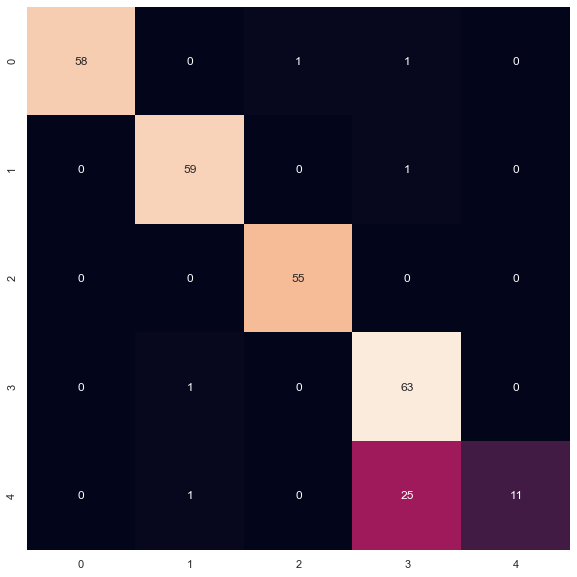

In [109]:
model.fit(X_train, labels_train)
labels_pred = model.predict(X_test)
conf_mat = confusion_matrix(labels_test, labels_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, square=True, ax=ax, cbar=False)

In [110]:
labels_mapping

{0: 'comp.graphics',
 1: 'rec.autos',
 2: 'rec.sport.hockey',
 3: 'soc.religion.christian',
 4: 'talk.religion.misc'}

In [111]:
from sklearn.neighbors import KNeighborsClassifier

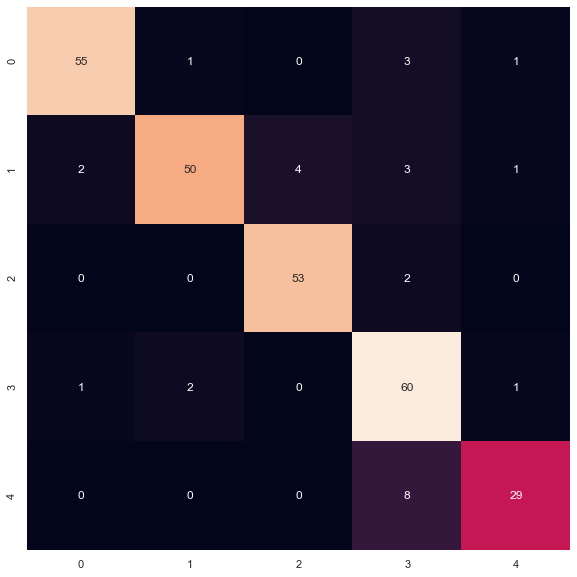

In [115]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, labels_train)
labels_pred = model.predict(X_test)
conf_mat = confusion_matrix(labels_test, labels_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, square=True, ax=ax, cbar=False)

In [117]:
scores = cross_val_score(model, X_train, labels_train, cv=5)
np.mean(scores)

0.8805425219941349

In [118]:
from sklearn.svm import SVC

In [147]:
pd.DataFrame(labels_train)

,0
0,4
1,0
2,0
3,3
4,0
...,...
2473,0
2474,2
2475,0
2476,4


In [120]:
model = SVC()
scores = cross_val_score(model, X_train, labels_train, cv=5)
np.mean(scores)

0.9322010426849137